In [1]:
import re
from struct import pack, unpack
import matplotlib.pyplot as mpl

In [2]:
header = dict()
    
header_list = [] # Определение вспомогательного списка для работы регулярной конструкции

    
f = open('010617_00_N1_00.pnt', 'rb')

first_line = f.readline() # Считывание количества параметров из файла
    
# Блок записи заголовка через регулярную конструкцию в словарь

header_re = re.compile(r'(?P<key>\w*)\s*(?P<value>.*)')
average_profile_re = re.compile(r'(?P<key>\w*)\s*(?P<value>.*)') 

res_dict = header_re.search(first_line.decode('utf-8')).groupdict()

header_list.append(res_dict["key"])

for k in range(int(res_dict['value'])-1):
    line = f.readline()
    res_dict = header_re.search(line.decode('utf-8')).groupdict()
    header_list.append(res_dict["key"])
    header[res_dict["key"]] = res_dict["value"] 
    
    
    
line_data = f.readline()    
    
f.close()

In [3]:
header

{'alpha': 'alpha',
 'date_begin': '31.05.2017 UTC 31.05.2017',
 'date_end': '01.06.2017',
 'delta': 'delta',
 'fbands': '109.20751953125 109.62255859375 110.03759765625 110.45263671875 110.86767578125 111.28759765625',
 'fcentral': '110.25',
 'modulus': '1 2 3 4 5 6',
 'nbands': '6',
 'npoints': '36018',
 'source': 'source',
 'time_begin': '23:00:00 UTC 19:00:00',
 'time_end': '0:00:00',
 'tresolution': '99.9424',
 'wb_total': '2.5',
 'wbands': '0.4150390625 0.4150390625 0.4150390625 0.4150390625 0.4150390625 0.4248046875'}

In [4]:
line_data

b"0\xfe*>?\xda,>Nie>[B^>\xb9wL>\x940M>>tH>\xe3\xa0'>\xb3\xd7C>\xf5rH>a\xc0]>\x18\x10X>\x0b\xbcA>u\x16G>\xb9o\x06>|\xae\x06>m\xed\x0b>#?8>h\x8a\x1f>\xa2p\x13>\xacO\x16>\xdbEe>\xb87\x9e>xm\x9b>\xca\xde\xac>\xc0}\xa8>\x97[\x8e>M\xb6\x97>v\xc4%>t\xf6*>\xf5\x14K>H\xc6i>\x8dsR>\xde\x10?>\x90\xbeC>`\x182>1R7>\xfe6^>\xbe\xa5h>w\x03^>\xd7\x9dQ>\x12\xceO>!\xf4Q>\xe9Jh>1*p>\x7f\x9d\x92>\xae\x12\x87>\xdd\x8bu>+\xbfx>\xf6w]>=\xe4\x8d>\xaf\x11\x8e>\x95i\xa0>\xdd,\xa1>m\x05\x8a>\xa0b\x8e>@}\x0b>\xd7\xb5 >3;/>\xbc\x9fD>\xc7\x862>\xc43\x1d>\x7f\xaa'>\xd9A\x02>\x19B\x05>\x815\x15>\xf8\x993>w\xc9'>;w\x16>:\xf5\x17>\x91\xc7\xf1={\xd9\x01>+(\x07>:\x0c*>\n"

In [5]:
line_data_array = bytearray(line_data)

In [6]:
len(line_data_array)

297

In [7]:
unpack('f'*len(modulus), )

NameError: name 'modulus' is not defined

In [11]:
def get_data(filename,header):
    print("reading")
    nbands = int(header["nbands"])
    npoints = int(header["npoints"])
    modulus = [ x for x in range(nbands)]
    print(modulus)
    data = []
    p = 0 
    modulus.append(max(modulus)+1)

    print(modulus)
    '''
    with open(filename, 'rb') as inh:
        for k in range(16):
            line = inh.readline()

        for t in range(npoints):
            data.append([])
            for r in range(48):
                data[t].append([])
                data[t][r].extend(list(unpack('f'*len(modulus),inh.read(4*len(modulus)))[0:(nbands+1)]))                       
    return data
    
    '''
    return

In [12]:
get_data('010617_00_N1_00.pnt', header)

reading
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]


In [57]:
%time data = get_data('010617_00_N1_00.pnt', header)

reading
CPU times: user 4.25 s, sys: 220 ms, total: 4.47 s
Wall time: 34.3 s


In [58]:
%reload_ext cython

In [79]:
%%cython

import os
from struct import pack, unpack

def get_data_cy(str filename, header):
    print("reading")
    
    cdef long int nbands, npoints, k, t, r, x, p
    
    nbands = int(header["nbands"])
    npoints = int(header["npoints"])
    modulus = [ x for x in range(nbands)]
    data = []
    p = 0 
    modulus.append(max(modulus)+1)


    with open(filename, 'rb') as inh:
        for k in range(16):
            line = inh.readline()

        for t in range(npoints):
            data.append([])
            for r in range(48):
                data[t].append([])
                data[t][r].extend(list(unpack('f'*len(modulus),inh.read(4*len(modulus)))[0:(nbands+1)]))                       
    return data

In [80]:
%time data = get_data_cy('010617_00_N1_00.pnt', header)

reading
CPU times: user 4.3 s, sys: 1.05 s, total: 5.35 s
Wall time: 3min 3s


In [46]:
len(data)

36018

In [18]:
len(data[0])

48

In [48]:
len(data[0][0])

7

In [52]:
data[0][0][0]

0.16698527336120605

In [26]:
_max = max(data[0])

In [27]:
len(_max)

7

In [25]:
_max

0.22403451800346375

In [28]:
_max

[0.4321376085281372,
 0.4774467349052429,
 0.4925228953361511,
 0.572849690914154,
 0.5441152453422546,
 0.49466472864151,
 0.5023987889289856]

In [16]:
max(st)

'y'

In [30]:
test_list = []
for i in range(int(header["npoints"])):
    test_list.append(data[i][0][0])

In [31]:
len(test_list)

36018

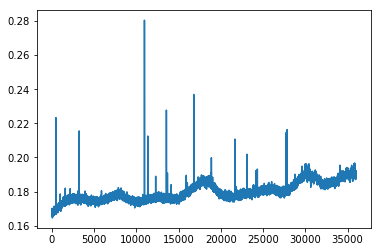

In [34]:
mpl.plot(test_list)
mpl.show()

In [51]:
test_list_1 = []
for i in range(int(header["npoints"])):
    test_list_1.append(data[i][47][6])

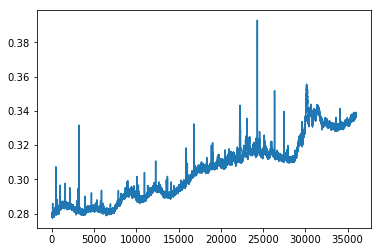

In [52]:
mpl.plot(test_list_1)
mpl.show()

In [55]:
def f():return 'Yep'

In [56]:
print(f())

Yep
